In [1]:
import pandas as pd
import numpy as np

import seaborn as sn

from census import Census

from matplotlib import pyplot as plt

import datetime as dt

from config import (gkey,api_key)

from scipy.stats import linregress

from us import states

import gmaps

# Access maps with unique API key
gmaps.configure(api_key=gkey)

c = Census(api_key, year=2017)


In [2]:
#accidents_source[["Start Date","Start Time"]]=accidents_source["Start_Time"].str.split(expand=True)

In [3]:
#accidents_source[["End Date","End Time"]]=accidents_source["End_Time"].str.split(expand=True)

In [4]:
accident_target=pd.read_csv("TargetData/us_accident_clean.csv")


In [5]:
accident_target.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
accident_target.columns


Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'City',
       'State', 'Zipcode', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset',
       'Start_Year', 'Season'],
      dtype='object')

In [7]:
accident_state_year=pd.DataFrame(accident_target[accident_target["Start_Time"]>='2017-01-01']\
                                 .groupby(["State","Start_Year"])["Start_Time"].count())\
.sort_values("Start_Time",ascending=False).reset_index()
#,columns=["State","Year","Accident Count"])
#.sort_values("Accident Count",ascending=False).reset_index()
accident_state_year.columns=["State","Year","Accident Count"]

#accident_state_year=accident_state_year
accident_state_year[["State","Year","Accident Count"]]

accident_state_year[accident_state_year["State"].isin(['CA'])]

,State,Year,Accident Count
0,CA,2019,213307
1,CA,2018,156777
2,CA,2017,152664


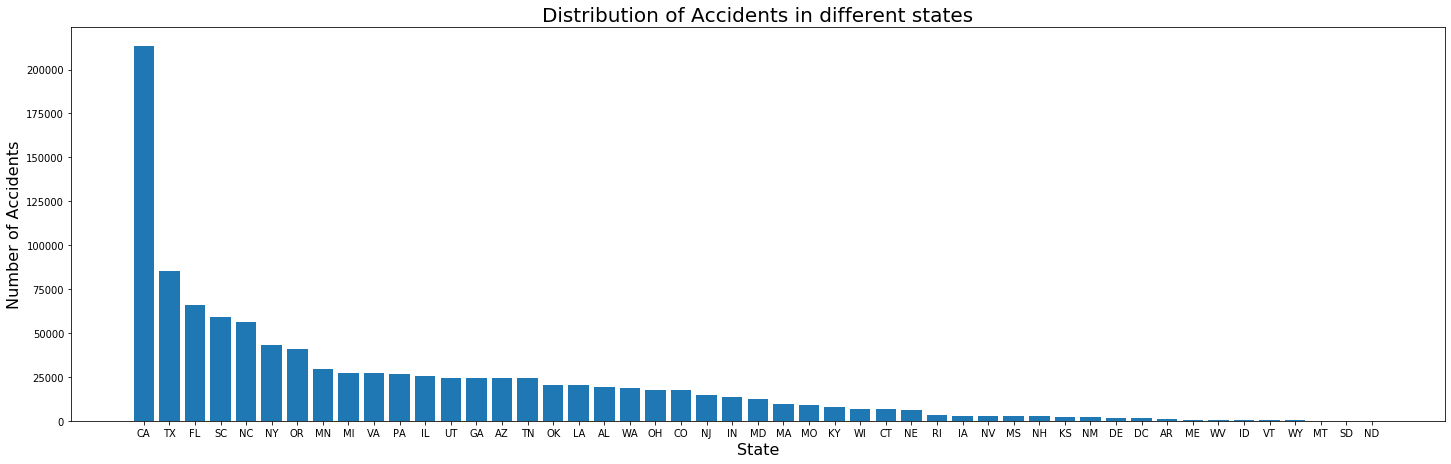

In [8]:
plt.figure(figsize=(20,6))
_=plt.bar(accident_state_year["State"],accident_state_year["Accident Count"])
plt.tight_layout()

plt.xlabel("State",fontsize=16)

plt.ylabel("Number of Accidents",fontsize=16)

_=plt.title("Distribution of Accidents in different states",fontsize=20)

In [9]:
accident_target["Start_Time"]=pd.to_datetime(accident_target["Start_Time"],format='%Y-%m-%d %H:%M:%S.%f')

In [10]:
accident_target["month_year"]=accident_target["Start_Time"].dt.year.astype(str)\
+'-'+accident_target["Start_Time"].dt.month.astype(str)

In [11]:
#accident_target.groupby("month_year")["Start_Time"].count().nlargest(3).index

In [12]:
max_accident_3mon=[]
max_accident_3mon.extend(accident_target.groupby("month_year")["Start_Time"].count().nlargest(3).index)

#max_accident_3mon

In [13]:
accident_target_max3mon=accident_target.loc[accident_target["month_year"].isin (max_accident_3mon)]

In [14]:
#accident_target.loc[accident_target["month_year"]==accident_target.groupby("month_year")["Start_Time"].count().idxmax()]

In [15]:
#accident_target_max3mon.head()

In [16]:
locations=accident_target_max3mon[["Start_Lat","Start_Lng"]]
#accident_target.loc[(accident_target["Start_Year"]==2019) & (accident_target["Season"]=='Winter'),["Start_Lat","Start_Lng"]]

In [17]:
fig=gmaps.figure()

heatmap_layer=gmaps.heatmap_layer(locations,dissipating=False, max_intensity=5,
                                 point_radius=0.1)


# Add layer
fig.add_layer(heatmap_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [18]:
cities_accidents=accident_target.groupby(["City"])["Start_Time"].count().nlargest(10).reset_index()
#locations_ca_ny.head()

cities_accidents.columns=["City","Accident Count"]

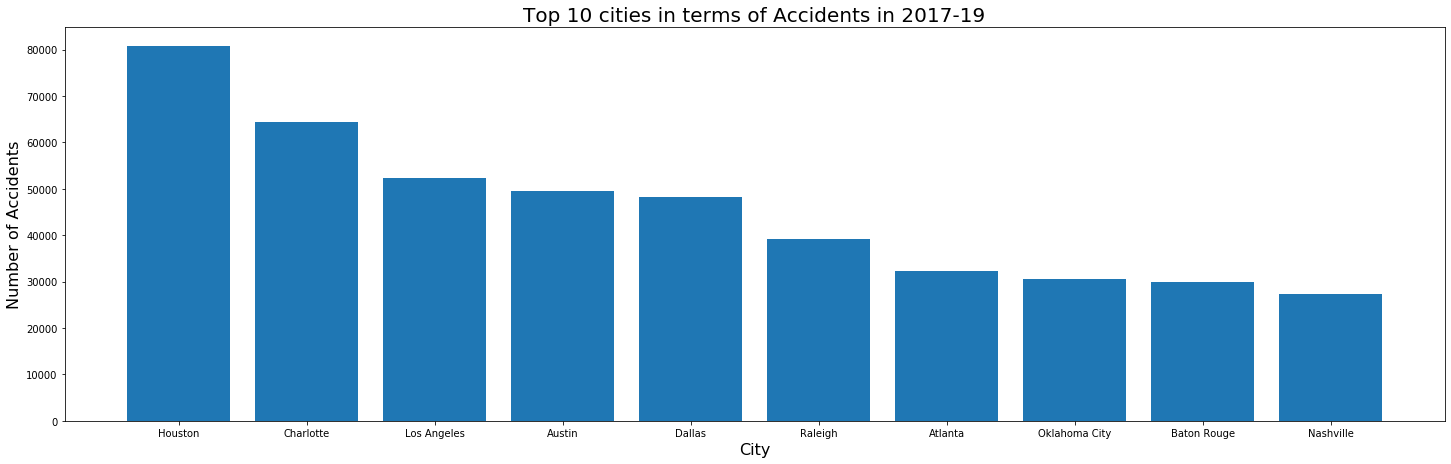

In [19]:
plt.figure(figsize=(20,6))
_=plt.bar(cities_accidents["City"],cities_accidents["Accident Count"])
plt.tight_layout()

plt.xlabel("City",fontsize=16)

plt.ylabel("Number of Accidents",fontsize=16)

_=plt.title("Top 10 cities in terms of Accidents in 2017-19",fontsize=20)

In [20]:
#c.acs5.get(('NAME', 'B25034_010E'),
#         {'for': 'state:{}'.format(states.MD.fips)})

In [21]:
#census_data_california=c.acs5.get(("NAME", "B01003_001E"),{'for': 'state:{}'.format(states.CA.fips)})

#census_pd = pd.DataFrame(census_data_california)

# Column Reordering
#census_pd = census_pd.rename(columns={"B01003_001E": "Population"})


In [22]:
#census_pd

In [23]:
'''states=[]
states.extend(list(accident_state_year.groupby("State")["Accident Count"].sum().nlargest(3).index.values))

states.extend(list(accident_state_year.groupby("State")["Accident Count"].sum().nsmallest(3).index.values))

states.append('NY')
print(states)'''

'states=[]\nstates.extend(list(accident_state_year.groupby("State")["Accident Count"].sum().nlargest(3).index.values))\n\nstates.extend(list(accident_state_year.groupby("State")["Accident Count"].sum().nsmallest(3).index.values))\n\nstates.append(\'NY\')\nprint(states)'

In [24]:
#accident_state_year_2017=accident_state_year[(accident_state_year["State"].isin(states)) & (accident_state_year["Year"]==2017)]
#accident_state_year_2017


In [25]:
#plt.figure(figsize=(10,8))
#_=plt.bar(accident_state_year_2017["State"],accident_state_year_2017["Accident Count"])
#plt.tight_layout()

# Analyze accidents across seasons

In [26]:
accident_target["Season_Year"]=np.select(
    [
        (accident_target["Start_Time"].dt.month== 1)| (accident_target["Start_Time"].dt.month== 2) 
    ], 
    [
       (accident_target["Start_Year"]-1).astype(str)+'-'+accident_target["Season"]
    ], 
    default=accident_target["Start_Year"].astype(str)+'-'+accident_target["Season"]
)


In [27]:
accident_target["Season_Year"].unique()

array(['2016-Winter', '2017-Spring', '2017-Summer', '2019-Winter',
       '2019-Fall', '2019-Summer', '2019-Spring', '2018-Winter',
       '2018-Fall', '2018-Summer', '2018-Spring', '2017-Winter',
       '2017-Fall'], dtype=object)

In [28]:
#accident_target[(accident_target["Season_Year"]=='2017-Winter') & (accident_target["Start_Time"].dt.month==2)]
#accident_target.head(200)


In [29]:
accident_target.loc[accident_target["Season_Year"]!='2019-Winter'].groupby("Season_Year")["Start_Time"].count()

Season_Year
2016-Winter    166888
2017-Fall      221794
2017-Spring    146476
2017-Summer    170318
2017-Winter    218047
2018-Fall      242553
2018-Spring    223482
2018-Summer    209903
2018-Winter    224036
2019-Fall      276361
2019-Spring    216264
2019-Summer    208964
Name: Start_Time, dtype: int64

In [30]:
accident_season_year_us=pd.DataFrame(accident_target.loc[accident_target["Season_Year"]!='2019-Winter'].groupby("Season_Year")["Start_Time"].count()).reset_index()

In [31]:
accident_season_year_us.rename(columns={"Start_Time":"Accident Count"},inplace=True)
accident_season_year_us=accident_season_year_us.reindex([0,2,3,1,4,6,7,5,8,10,11,9]).reset_index(drop=True)

accident_season_year_us

,Season_Year,Accident Count
0,2016-Winter,166888
1,2017-Spring,146476
2,2017-Summer,170318
3,2017-Fall,221794
4,2017-Winter,218047
5,2018-Spring,223482
6,2018-Summer,209903
7,2018-Fall,242553
8,2018-Winter,224036
9,2019-Spring,216264


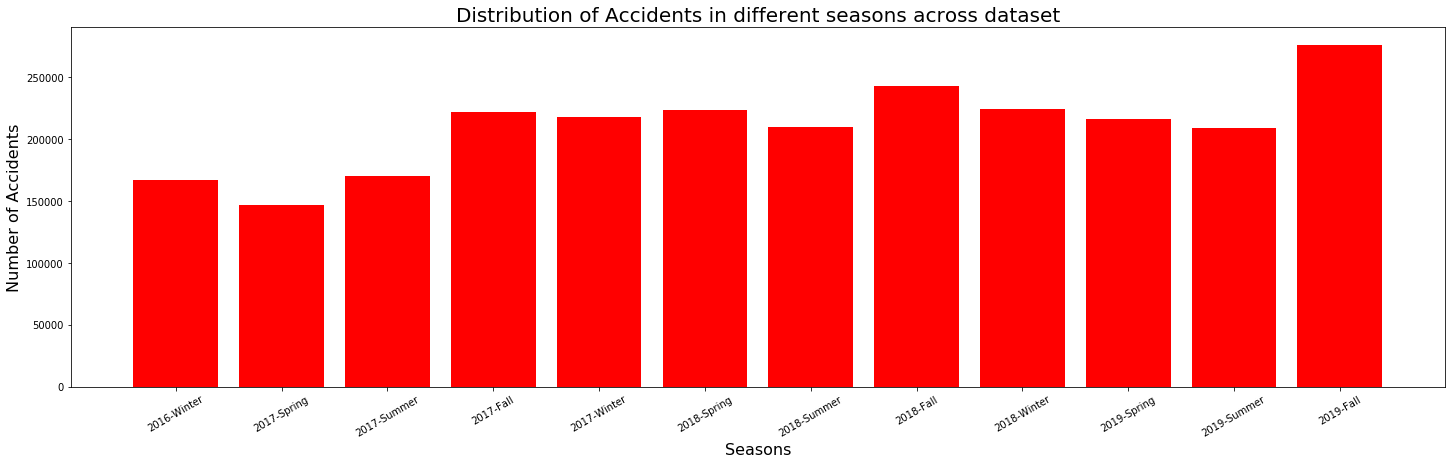

In [32]:
plt.figure(figsize=(20,6))
plt.bar(accident_season_year_us["Season_Year"],accident_season_year_us["Accident Count"],alpha=1.0,color="red",align="center")
_=plt.xticks(rotation=30)
plt.tight_layout()

plt.xlabel("Seasons",fontsize=16)
plt.ylabel("Number of Accidents",fontsize=16)

_=plt.title("Distribution of Accidents in different seasons across dataset",fontsize=20)

# Analyze impact of Weather Factors on Number of Accident across data

In [33]:
def factor_accident_correlation(factor,line_x,line_y):
    accident_count_factor=accident_target.groupby(factor).count().reset_index()
    #accident_count_humidity.head()
    x_axis=accident_count_factor[factor]
    y_axis=accident_count_factor["Start_Time"]
    
    #fig=plt.figure(figsize=(12,8))
    
    _=plt.scatter(x_axis,y_axis)
    
    plt.title(f"Number of Accidents vs {factor}")
    plt.xlabel(f"{factor}")
    plt.ylabel("Number of Accidents")
    
    #plt.yticks(np.arange(min(accident_count_factor["Start_Time"]),max(accident_count_factor["Start_Time"])+10000,10000))
    
    #plt.xticks(np.arange(min(accident_count_factor[factor]),max(accident_count_factor[factor])+5,10))
    
    slope,intercept,p,r,stderr=linregress(x_axis,y_axis)
    
    line_eq=f"y= {round(slope,2)}*x + {round(intercept,2)}"
    
    plt.plot(x_axis,((slope*x_axis)+intercept),"r--")
    
    _=plt.annotate(line_eq,(line_x,line_y),color="red",fontsize=15)
    
    plt.tight_layout()
    
    print(f"The r-squared value is: {r**2}")
    

## Analyze impact of Humidity on Number of Accident across data

The r-squared value is: 5.071795777520729e-34


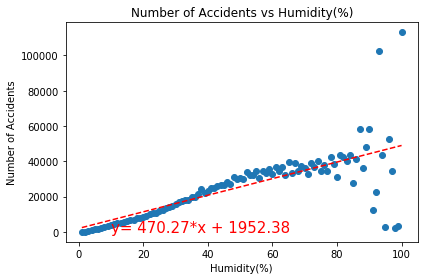

In [34]:
factor_accident_correlation('Humidity(%)',10,50)

## Analyze impact of Temperature on Number of Accident across data

The r-squared value is: 3.385474160131755e-09


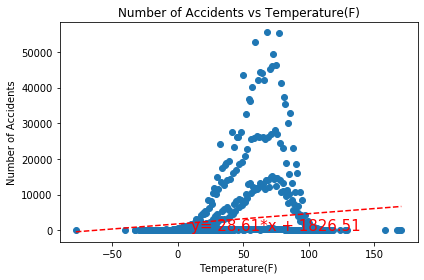

In [35]:
factor_accident_correlation('Temperature(F)',10,50)

## Analyze impact of Visibility on Number of Accident across data

The r-squared value is: 0.3413943281402977


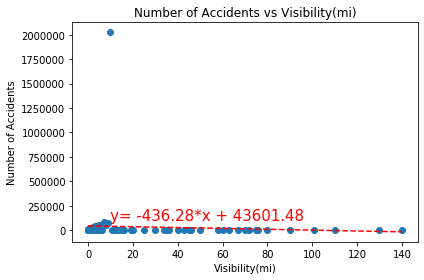

In [36]:
factor_accident_correlation('Visibility(mi)',10,100000)

In [37]:
accident_target.groupby("Visibility(mi)").count().sort_values("Start_Time", ascending=False)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Pressure(in),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,month_year,Season_Year
Visibility(mi),,,,,,,,,,,,,,,,,,,,,
10.0,2025659,2025659,2025659,2025659,2025659,2025620,2025659,2025659,2019829,856290,...,2022977,2021561,1793488,659870,2020522,2025617,2025659,2025659,2025659,2025659
7.0,80734,80734,80734,80734,80734,80732,80734,80734,80217,33304,...,80588,80534,65375,33886,80523,80732,80734,80734,80734,80734
9.0,70419,70419,70419,70419,70419,70417,70419,70419,70295,29093,...,70331,70299,59003,30157,70222,70417,70419,70419,70419,70419
8.0,56006,56006,56006,56006,56006,56006,56006,56006,55840,23144,...,55930,55910,46494,25481,55866,56006,56006,56006,56006,56006
5.0,53230,53230,53230,53230,53230,53227,53230,53230,52948,22980,...,53144,53167,43428,26960,53198,53227,53230,53230,53230,53230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72.0,1,1,1,1,1,1,1,1,1,0,...,1,1,0,1,1,1,1,1,1,1
16.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
101.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1


The r-squared value is: 0.0023985851666538517


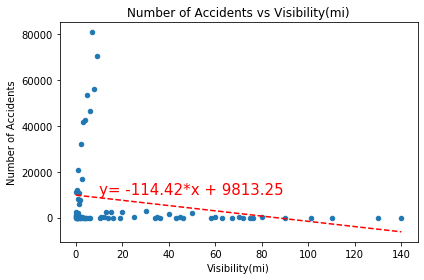

In [38]:
factor="Visibility(mi)"
accident_count_factor=accident_target.loc[accident_target[factor]!=10.0].groupby(factor).count().reset_index()
x_axis=accident_count_factor[factor]
y_axis=accident_count_factor["Start_Time"]

#fig=plt.figure(figsize=(10,6))

_=plt.scatter(x_axis,y_axis,s=20)

plt.title(f"Number of Accidents vs {factor}")
plt.xlabel(f"{factor}")
plt.ylabel("Number of Accidents")

#plt.yticks(np.arange(min(accident_count_factor["Start_Time"]),max(accident_count_factor["Start_Time"])+10000,10000))

#plt.xticks(np.arange(min(accident_count_factor[factor]),max(accident_count_factor[factor])+5,10))

slope,intercept,p,r,stderr=linregress(x_axis,y_axis)

line_eq=f"y= {round(slope,2)}*x + {round(intercept,2)}"

plt.plot(x_axis,((slope*x_axis)+intercept),"r--")

_=plt.annotate(line_eq,(10,10000),color="red",fontsize=15)

plt.tight_layout()

print(f"The r-squared value is: {r**2}")

## Analyze impact of Wind Speed on Number of Accident across data

The r-squared value is: 1.4994466322746603e-06


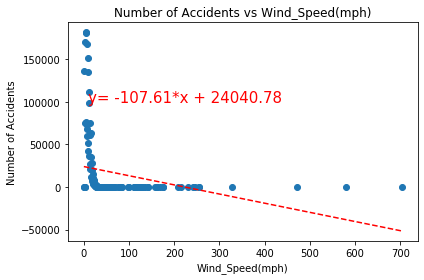

In [39]:
factor_accident_correlation('Wind_Speed(mph)',10,100000)

## Analyze impact of Multiple-factors on Number of Accident across data

In [40]:
multi_factor=["Temperature(F)","Humidity(%)","Visibility(mi)","Wind_Speed(mph)"]

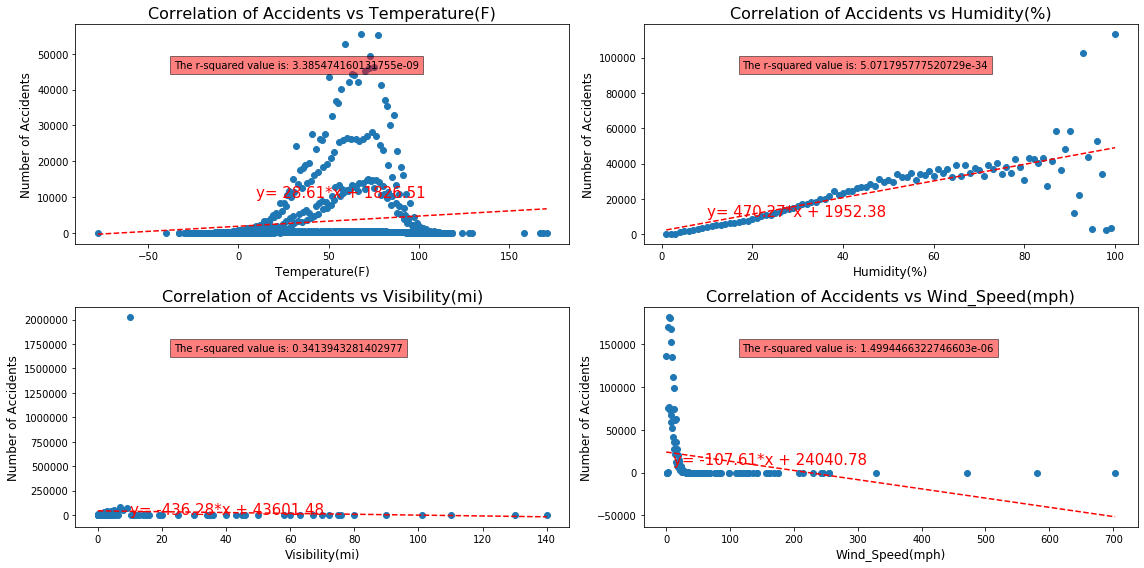

In [41]:
fig,ax =  plt.subplots(2,2,figsize=(16,8))
#fig=plt.figure(figsize=(20,8))

#multi_factor=["Humidity(%)","Visibility(mi)","Temperature(F)","Wind_Speed(mph)"]
#,"Precipitation(in)"
x_cord=0
y_cord=0

for factor in multi_factor:
    accident_count_factor=accident_target.groupby(factor).count().reset_index()
    #.loc[accident_target[factor]!=10.0]
    x_axis=accident_count_factor[factor]
    y_axis=accident_count_factor["Start_Time"]

    ax[x_cord][y_cord].scatter(x_axis,y_axis)
    
    ax[x_cord][y_cord].set_title(f"Correlation of Accidents vs {factor}",fontsize=16)
    ax[x_cord][y_cord].set_xlabel(f"{factor}",fontsize=12)
    ax[x_cord][y_cord].set_ylabel("Number of Accidents",fontsize=12)

    #plt.yticks(np.arange(min(accident_count_factor["Start_Time"]),max(accident_count_factor["Start_Time"])+10000,10000))

    #plt.xticks(np.arange(min(accident_count_factor[factor]),max(accident_count_factor[factor])+5,10))

    slope,intercept,p,r,stderr=linregress(x_axis,y_axis)

    line_eq=f"y= {round(slope,2)}*x + {round(intercept,2)}"

    ax[x_cord][y_cord].plot(x_axis,((slope*x_axis)+intercept),"r--")

    ax[x_cord][y_cord].annotate(line_eq,(10,10000),color="red",fontsize=15)
    
    ax[x_cord][y_cord].text(0.2, 0.8,f"The r-squared value is: {r**2}", transform=ax[x_cord][y_cord].transAxes,bbox=dict(facecolor='red', alpha=0.5))
    
    if(x_cord==0 and y_cord==0):
        y_cord=1
    elif (x_cord==0 and y_cord==1):
        x_cord=1
        y_cord=0
    elif (x_cord==1 and y_cord==0):
        y_cord=1
       

    plt.tight_layout()

    #print(f"The r-squared value for Number of Accidents vs {factor} is: {r**2}")
    


## Analyze impact of Multiple-factors on Number of Accident in Calfornia

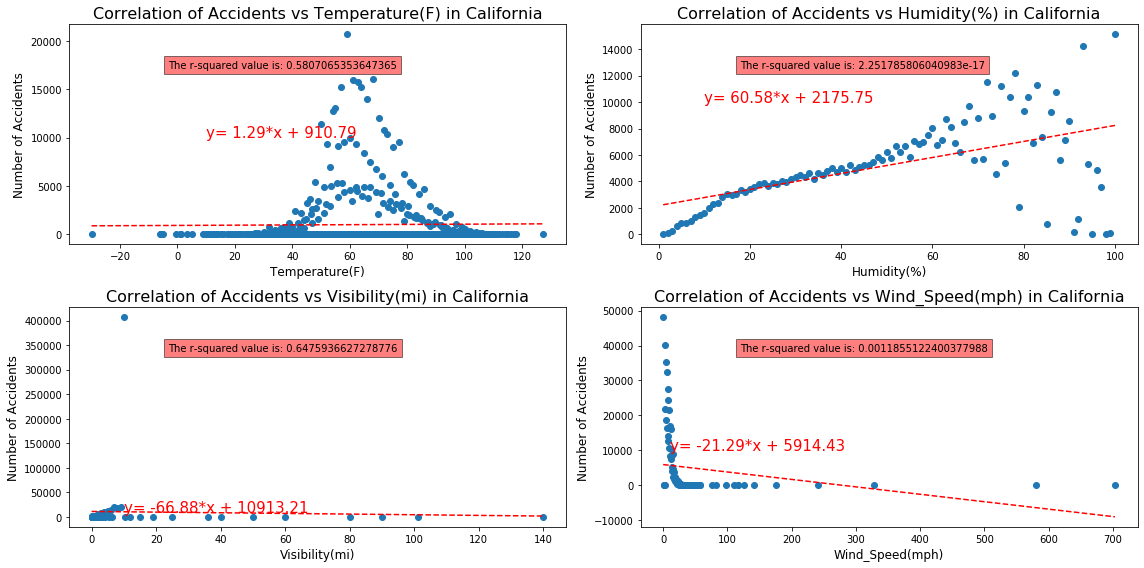

In [42]:
fig,ax =  plt.subplots(2,2,figsize=(16,8))
#fig=plt.figure(figsize=(20,8))

#multi_factor=["Humidity(%)","Visibility(mi)","Temperature(F)","Wind_Speed(mph)"]
#,"Precipitation(in)"
x_cord=0
y_cord=0

for factor in multi_factor:
    accident_count_factor=accident_target.loc[accident_target["State"]=="CA"].groupby(factor).count().reset_index()
    #.loc[accident_target[factor]!=10.0]
    x_axis=accident_count_factor[factor]
    y_axis=accident_count_factor["Start_Time"]

    ax[x_cord][y_cord].scatter(x_axis,y_axis)
    
    ax[x_cord][y_cord].set_title(f"Correlation of Accidents vs {factor} in California",fontsize=16)
    ax[x_cord][y_cord].set_xlabel(f"{factor}",fontsize=12)
    ax[x_cord][y_cord].set_ylabel("Number of Accidents",fontsize=12)

    #plt.yticks(np.arange(min(accident_count_factor["Start_Time"]),max(accident_count_factor["Start_Time"])+10000,10000))

    #plt.xticks(np.arange(min(accident_count_factor[factor]),max(accident_count_factor[factor])+5,10))

    slope,intercept,p,r,stderr=linregress(x_axis,y_axis)

    line_eq=f"y= {round(slope,2)}*x + {round(intercept,2)}"

    ax[x_cord][y_cord].plot(x_axis,((slope*x_axis)+intercept),"r--")

    ax[x_cord][y_cord].annotate(line_eq,(10,10000),color="red",fontsize=15)
    
    ax[x_cord][y_cord].text(0.2, 0.8,f"The r-squared value is: {r**2}", transform=ax[x_cord][y_cord].transAxes,bbox=dict(facecolor='red', alpha=0.5))
    
    if(x_cord==0 and y_cord==0):
        y_cord=1
    elif (x_cord==0 and y_cord==1):
        x_cord=1
        y_cord=0
    elif (x_cord==1 and y_cord==0):
        y_cord=1
        y_cord=1

    plt.tight_layout()

## Analyze impact of Multiple-factors on Number of Accident in New York

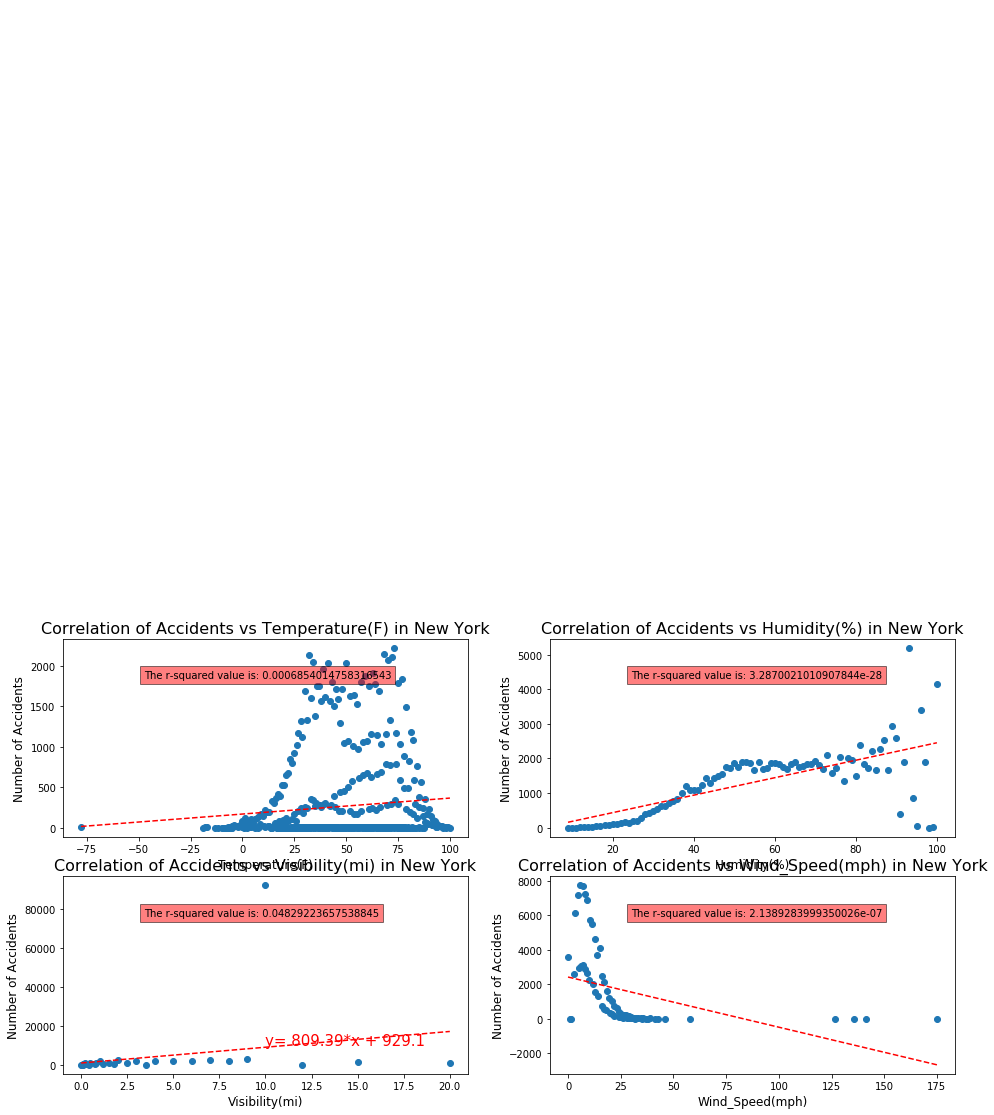

In [43]:
fig,ax =  plt.subplots(2,2,figsize=(16,8))
#fig=plt.figure(figsize=(20,8))

#multi_factor=["Humidity(%)","Visibility(mi)","Temperature(F)","Wind_Speed(mph)"]
#,"Precipitation(in)"
x_cord=0
y_cord=0

for factor in multi_factor:
    accident_count_factor=accident_target.loc[accident_target["State"]=="NY"].groupby(factor).count().reset_index()
    #.loc[accident_target[factor]!=10.0]
    x_axis=accident_count_factor[factor]
    y_axis=accident_count_factor["Start_Time"]

    ax[x_cord][y_cord].scatter(x_axis,y_axis)
    
    ax[x_cord][y_cord].set_title(f"Correlation of Accidents vs {factor} in New York",fontsize=16)
    ax[x_cord][y_cord].set_xlabel(f"{factor}",fontsize=12)
    ax[x_cord][y_cord].set_ylabel("Number of Accidents",fontsize=12)

    #plt.yticks(np.arange(min(accident_count_factor["Start_Time"]),max(accident_count_factor["Start_Time"])+10000,10000))

    #plt.xticks(np.arange(min(accident_count_factor[factor]),max(accident_count_factor[factor])+5,10))

    slope,intercept,p,r,stderr=linregress(x_axis,y_axis)

    line_eq=f"y= {round(slope,2)}*x + {round(intercept,2)}"

    ax[x_cord][y_cord].plot(x_axis,((slope*x_axis)+intercept),"r--")

    ax[x_cord][y_cord].annotate(line_eq,(10,10000),color="red",fontsize=15)
    
    ax[x_cord][y_cord].text(0.2, 0.8,f"The r-squared value is: {r**2}", transform=ax[x_cord][y_cord].transAxes,bbox=dict(facecolor='red', alpha=0.5))
    
    if(x_cord==0 and y_cord==0):
        y_cord=1
    elif (x_cord==0 and y_cord==1):
        x_cord=1
        y_cord=0
    elif (x_cord==1 and y_cord==0):
        y_cord=1
        y_cord=1

    #plt.tight_layout()


## Correlation of multiple-factors together on number of accidents

In [44]:
#multi_factor=["Temperature(F)","Humidity(%)","Visibility(mi)","Wind_Speed(mph)","Precipitation(in)"]

In [45]:
accident_count_multifactor_corr=pd.DataFrame(accident_target.groupby(multi_factor)["Start_Time"].count()).reset_index()
accident_count_multifactor_corr.rename(columns={"Start_Time":"Accident Count"},inplace=True)

accident_count_multifactor_corr.head(200)

,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Accident Count
0,-29.0,62.0,10.0,18.4,1
1,-29.0,69.0,6.0,10.4,2
2,-29.0,81.0,10.0,3.5,1
3,-27.9,62.0,10.0,15.0,1
4,-27.9,65.0,9.0,12.7,4
...,...,...,...,...,...
195,-16.2,80.0,10.0,4.6,1
196,-16.1,52.0,4.0,21.9,2
197,-16.1,52.0,10.0,19.6,1
198,-16.1,55.0,10.0,8.1,1


In [46]:
#accident_count_multifactor_corr=pd.DataFrame(accident_target.groupby(multi_factor)["Start_Time"].count())
corrmatrix= accident_count_multifactor_corr.corr() 
#print(corrmatrix)


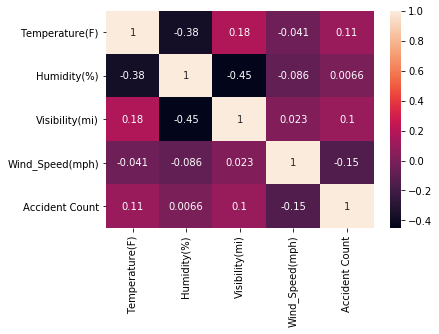

In [47]:
_=sn.heatmap(corrmatrix,annot=True)